In [5]:
%load_ext autoreload
%autoreload 2
%aimport

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Modules to reload:
all-except-skipped

Modules to skip:



In [6]:
%matplotlib inline

In [7]:
from relaxed.plot_defaults import *

In [8]:
import astropy
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt 
import re 
from astropy.table import Table
import astropy.table
import json
from scipy import stats
from copy import deepcopy
import scipy
import warnings

import matplotlib as mpl
from sklearn.model_selection import train_test_split

In [9]:
from relaxed.analysis import setup, get_quantiles, get_am, get_an_from_am, get_lam, get_ma, get_gradient, get_fractional_tdyn, get_savgol_grads, get_tt_indices

In [10]:
hcat, indices, scales = setup('m11', path='../../../output/30k')

# `scale_of_last_MM` (ROCKSTAR)

## Histogram

Text(0.5, 0, '$a_{\\rm MM}$')

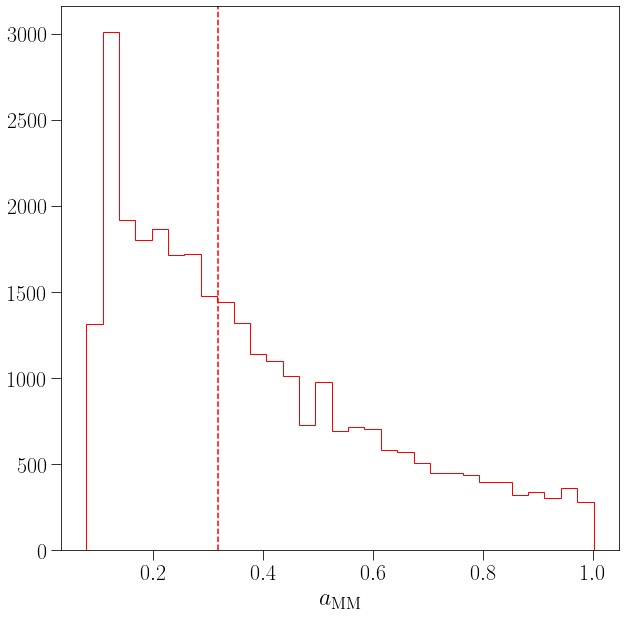

In [16]:
fig, ax= plt.subplots(1,1,figsize=(10,10))
draw_histogram(ax, hcat.cat['scale_of_last_mm'], bins=31, color='r', vline='median')
ax.set_xlabel(r'$a_{\rm MM}$')

## Correlations

In [17]:
from scipy.stats import spearmanr

def plot_correlation_matrix(ax, values, cell_text_size=14):
    # values: list of values of ech para
    n_params = len(values)
    matrix = np.zeros((n_params, n_params))

    for i, value1 in enumerate(values):
        for j, value2 in enumerate(values):
            matrix[i, j] = spearmanr(value1, value2)[0]

    # mask out lower off-diagonal elements if requested.
    im = ax.matshow(matrix, cmap="bwr", vmin=-1, vmax=1)
    plt.colorbar(im, ax=ax)

    # add the values to each cell
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            _ = ax.text(
                j,
                i,
                round(matrix[i, j], 2),
                ha="center",
                va="center",
                color="k",
                size=cell_text_size,
            )

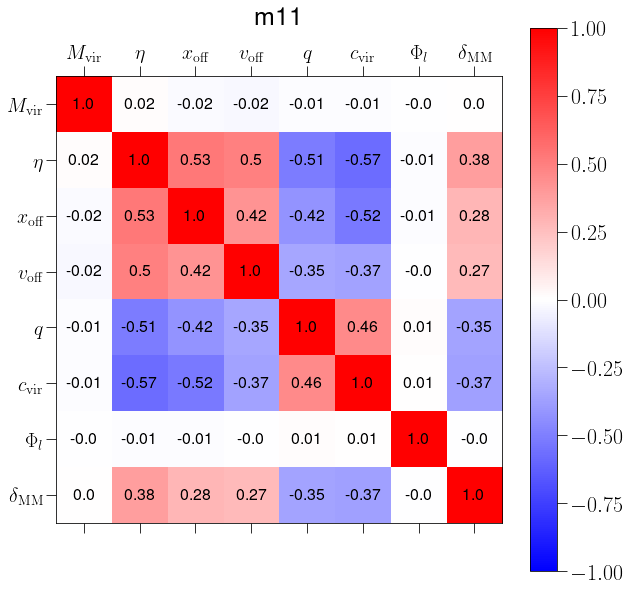

<Figure size 720x720 with 0 Axes>

In [21]:
from relaxed import halo_parameters, halo_catalogs 
from relaxed.halo_parameters import get_hparam

params = ["mvir", "eta", "x0", "v0", "q", "cvir", "phi_l", 'scale_of_last_mm']
hparams = {param: get_hparam(param, log=True) for param in params}
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

latex_params = [
    hparams[param].get_text(only_param=True)
    for param in params
]
values = [
    hparams[param].get_values(hcat.cat)
    for param in params
]

plot_correlation_matrix(ax, values, cell_text_size=16)

ax.set_xticks(range(len(latex_params)))
ax.set_xticklabels(latex_params, size=20)

ax.set_yticks(range(len(latex_params)))
ax.set_yticklabels(latex_params, size=20)

ax.set_title('m11', size=25, pad=20)
    
plt.show()
plt.tight_layout()



## 2D histogram